# 数据分析
1. 异常值处理 删除异常值
2. 删除数据量过少的股票的数据

In [1]:
# 读取文件
import pandas as pd
from tqdm import tqdm
df = pd.read_csv('data.csv')
df

/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
Duplicate key in file PosixPath('/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'), line 400 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')
/home/tianhao/env4tiho_py36/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
0,2016-01-04,000001.SZ,56349787.0,6.603762e+08,0.4774,-5.51,11.719231,0,935.197763,990.500720,992.976972,926.943591
1,2016-01-05,000001.SZ,66326995.0,7.555314e+08,0.5619,0.61,11.391008,0,940.975684,930.245260,955.007778,920.340253
2,2016-01-06,000001.SZ,51570644.0,5.916985e+08,0.4369,1.14,11.473553,0,951.706109,942.626519,954.182361,940.150267
3,2016-01-07,000001.SZ,17476110.0,1.948695e+08,0.1481,-5.12,11.150622,0,903.006490,941.801102,941.801102,900.530238
4,2016-01-08,000001.SZ,74752758.0,8.313345e+08,0.6333,1.64,11.121122,0,917.864001,925.292756,931.896094,899.704821
...,...,...,...,...,...,...,...,...,...,...,...,...
4580328,2021-07-26,689009.SH,2008700.0,1.309806e+08,3.3200,-1.32,65.206660,0,67.180000,67.860000,67.860000,63.000000
4580329,2021-07-27,689009.SH,1835700.0,1.245621e+08,3.0300,-0.04,67.855344,0,67.150000,66.000000,70.970000,65.160000
4580330,2021-07-28,689009.SH,1741400.0,1.142330e+08,2.8800,0.48,65.598397,0,67.470000,66.010000,67.590000,63.010000
4580331,2021-07-29,689009.SH,1619800.0,1.121369e+08,2.6800,0.84,69.228825,0,68.040000,67.800000,70.550000,67.130000


## 1. 异常值处理

这里使用了`线箱法`处理异常值
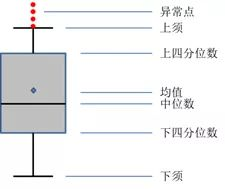

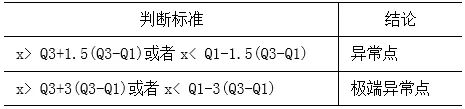

这里我们使用筛去了`x > Q3 + 5(Q3 - Q1)`与`x < Q3 - 3(Q3 - Q1)`的数据

### 1.1 对于`volume`的异常值处理

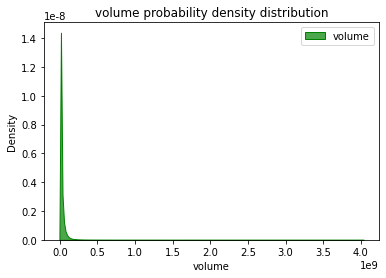

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# 密度图
 
# Draw Plot
sns.kdeplot(df['volume'], shade=True, color="g", label="volume", alpha=.7)

# Decoration
plt.title('volume probability density distribution')
plt.legend()
plt.show()

In [3]:
df['volume'].describe()

count    4.580333e+06
mean     1.402015e+07
std      3.295045e+07
min      1.000000e+02
25%      2.463927e+06
50%      5.755484e+06
75%      1.384698e+07
max      4.034860e+09
Name: volume, dtype: float64

In [4]:
q1 = df['volume'].quantile(0.25)
q2 = df['volume'].quantile()
q3 = df['volume'].quantile(0.75)
max_outlier = q3 + 5 * (q3 - q1)
min_outlier = q1 - 3 * (q3 - q1)
df = df[(df['volume'] <= max_outlier) & (df['volume'] >= min_outlier)]
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
0,2016-01-04,000001.SZ,56349787.0,6.603762e+08,0.4774,-5.51,11.719231,0,935.197763,990.500720,992.976972,926.943591
1,2016-01-05,000001.SZ,66326995.0,7.555314e+08,0.5619,0.61,11.391008,0,940.975684,930.245260,955.007778,920.340253
2,2016-01-06,000001.SZ,51570644.0,5.916985e+08,0.4369,1.14,11.473553,0,951.706109,942.626519,954.182361,940.150267
3,2016-01-07,000001.SZ,17476110.0,1.948695e+08,0.1481,-5.12,11.150622,0,903.006490,941.801102,941.801102,900.530238
6,2016-01-12,000001.SZ,56164230.0,6.059708e+08,0.4758,0.46,10.789266,0,892.276066,893.926900,900.530238,878.243972
...,...,...,...,...,...,...,...,...,...,...,...,...
4580328,2021-07-26,689009.SH,2008700.0,1.309806e+08,3.3200,-1.32,65.206660,0,67.180000,67.860000,67.860000,63.000000
4580329,2021-07-27,689009.SH,1835700.0,1.245621e+08,3.0300,-0.04,67.855344,0,67.150000,66.000000,70.970000,65.160000
4580330,2021-07-28,689009.SH,1741400.0,1.142330e+08,2.8800,0.48,65.598397,0,67.470000,66.010000,67.590000,63.010000
4580331,2021-07-29,689009.SH,1619800.0,1.121369e+08,2.6800,0.84,69.228825,0,68.040000,67.800000,70.550000,67.130000


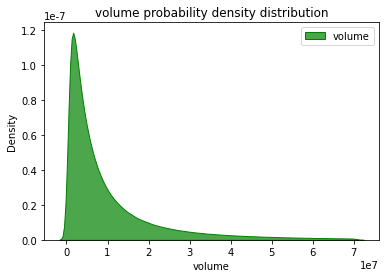

In [5]:
# Draw Plot
sns.kdeplot(df['volume'], shade=True, color="g", label="volume", alpha=.7)

# Decoration
plt.title('volume probability density distribution')
plt.legend()
plt.show()

### 1.2 对于`turnover`的异常值处理

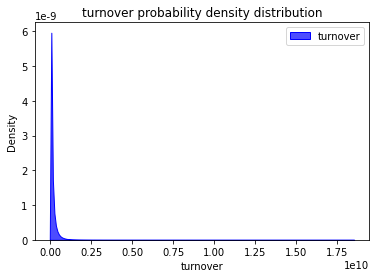

In [6]:
# Draw Plot
sns.kdeplot(df['turnover'], shade=True, color="b", label="turnover", alpha=.7)

# Decoration
plt.title('turnover probability density distribution')
plt.legend()
plt.show()

In [7]:
df['turnover'].describe()

count    4.443324e+06
mean     1.393150e+08
std      2.695434e+08
min      2.108000e+03
25%      2.821006e+07
50%      6.420317e+07
75%      1.495593e+08
max      1.849878e+10
Name: turnover, dtype: float64

In [8]:
q1 = df['turnover'].quantile(0.25)
q2 = df['turnover'].quantile()
q3 = df['turnover'].quantile(0.75)
max_outlier = q3 + 5 * (q3 - q1)
min_outlier = q1 - 3 * (q3 - q1)
df = df[(df['turnover'] <= max_outlier) & (df['turnover'] >= min_outlier)]
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
0,2016-01-04,000001.SZ,56349787.0,6.603762e+08,0.4774,-5.51,11.719231,0,935.197763,990.500720,992.976972,926.943591
1,2016-01-05,000001.SZ,66326995.0,7.555314e+08,0.5619,0.61,11.391008,0,940.975684,930.245260,955.007778,920.340253
2,2016-01-06,000001.SZ,51570644.0,5.916985e+08,0.4369,1.14,11.473553,0,951.706109,942.626519,954.182361,940.150267
3,2016-01-07,000001.SZ,17476110.0,1.948695e+08,0.1481,-5.12,11.150622,0,903.006490,941.801102,941.801102,900.530238
6,2016-01-12,000001.SZ,56164230.0,6.059708e+08,0.4758,0.46,10.789266,0,892.276066,893.926900,900.530238,878.243972
...,...,...,...,...,...,...,...,...,...,...,...,...
4580328,2021-07-26,689009.SH,2008700.0,1.309806e+08,3.3200,-1.32,65.206660,0,67.180000,67.860000,67.860000,63.000000
4580329,2021-07-27,689009.SH,1835700.0,1.245621e+08,3.0300,-0.04,67.855344,0,67.150000,66.000000,70.970000,65.160000
4580330,2021-07-28,689009.SH,1741400.0,1.142330e+08,2.8800,0.48,65.598397,0,67.470000,66.010000,67.590000,63.010000
4580331,2021-07-29,689009.SH,1619800.0,1.121369e+08,2.6800,0.84,69.228825,0,68.040000,67.800000,70.550000,67.130000


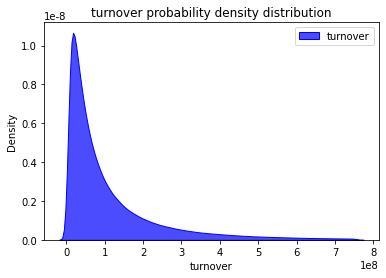

In [9]:
# Draw Plot
sns.kdeplot(df['turnover'], shade=True, color="b", label="turnover", alpha=.7)

# Decoration
plt.title('turnover probability density distribution')
plt.legend()
plt.show()

### 1.3 对于`vwap`的异常值处理

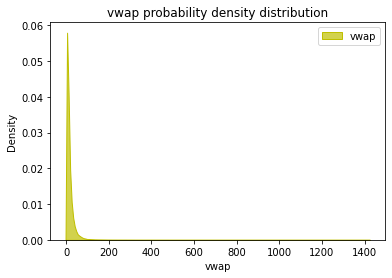

In [10]:
# Draw Plot
sns.kdeplot(df['vwap'], shade=True, color="y", label="vwap", alpha=.7)

# Decoration
plt.title('vwap probability density distribution')
plt.legend()
plt.show()

In [11]:
df['vwap'].describe()

count    4.343012e+06
mean     1.743910e+01
std      2.370937e+01
min      6.100000e-01
25%      6.524328e+00
50%      1.118978e+01
75%      1.991053e+01
max      1.421385e+03
Name: vwap, dtype: float64

In [12]:
q1 = df['vwap'].quantile(0.25)
q2 = df['vwap'].quantile()
q3 = df['vwap'].quantile(0.75)
max_outlier = q3 + 5 * (q3 - q1)
min_outlier = q1 - 3 * (q3 - q1)
df = df[(df['vwap'] <= max_outlier) & (df['vwap'] >= min_outlier)]
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
0,2016-01-04,000001.SZ,56349787.0,6.603762e+08,0.4774,-5.51,11.719231,0,935.197763,990.500720,992.976972,926.943591
1,2016-01-05,000001.SZ,66326995.0,7.555314e+08,0.5619,0.61,11.391008,0,940.975684,930.245260,955.007778,920.340253
2,2016-01-06,000001.SZ,51570644.0,5.916985e+08,0.4369,1.14,11.473553,0,951.706109,942.626519,954.182361,940.150267
3,2016-01-07,000001.SZ,17476110.0,1.948695e+08,0.1481,-5.12,11.150622,0,903.006490,941.801102,941.801102,900.530238
6,2016-01-12,000001.SZ,56164230.0,6.059708e+08,0.4758,0.46,10.789266,0,892.276066,893.926900,900.530238,878.243972
...,...,...,...,...,...,...,...,...,...,...,...,...
4580328,2021-07-26,689009.SH,2008700.0,1.309806e+08,3.3200,-1.32,65.206660,0,67.180000,67.860000,67.860000,63.000000
4580329,2021-07-27,689009.SH,1835700.0,1.245621e+08,3.0300,-0.04,67.855344,0,67.150000,66.000000,70.970000,65.160000
4580330,2021-07-28,689009.SH,1741400.0,1.142330e+08,2.8800,0.48,65.598397,0,67.470000,66.010000,67.590000,63.010000
4580331,2021-07-29,689009.SH,1619800.0,1.121369e+08,2.6800,0.84,69.228825,0,68.040000,67.800000,70.550000,67.130000


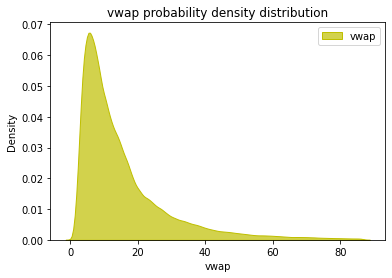

In [13]:
# Draw Plot
sns.kdeplot(df['vwap'], shade=True, color="y", label="vwap", alpha=.7)

# Decoration
plt.title('vwap probability density distribution')
plt.legend()
plt.show()

### 1.4 对于`adj_open`的异常值处理

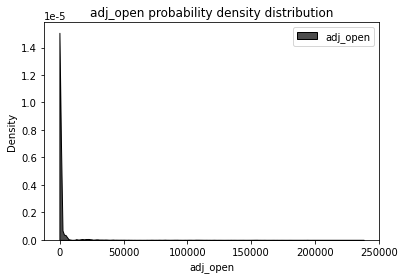

In [14]:
# Draw Plot
sns.kdeplot(df['adj_open'], shade=True, color="black", label="adj_open", alpha=.7)

# Decoration
plt.title('adj_open probability density distribution')
plt.legend()
plt.show()

In [15]:
df['adj_open'].describe()

count    4.279753e+06
mean     1.208795e+02
std      1.974108e+03
min      1.082400e+00
25%      2.163753e+01
50%      3.786903e+01
75%      6.610000e+01
max      2.379521e+05
Name: adj_open, dtype: float64

In [16]:
q1 = df['adj_open'].quantile(0.25)
q2 = df['adj_open'].quantile()
q3 = df['adj_open'].quantile(0.75)
max_outlier = q3 + 5 * (q3 - q1)
min_outlier = q1 - 5 * (q3 - q1)
df = df[(df['adj_open'] <= max_outlier) & (df['adj_open'] >= min_outlier)]
df

,dt,kdcode,volume,turnover,turn,pct_chg,vwap,trade_status,adj_close,adj_open,adj_high,adj_low
2588,2016-01-04,000004.SZ,2283380.0,9.767487e+07,2.7223,-10.0000,42.776439,0,243.215104,270.239004,274.360296,243.215104
2589,2016-01-05,000004.SZ,3883664.0,1.505349e+08,4.6303,-6.3665,38.761049,0,227.730821,220.783500,240.742328,218.899481
2590,2016-01-06,000004.SZ,2114757.0,8.257999e+07,2.5213,1.2927,39.049400,0,230.674601,227.259816,235.502400,223.727280
2591,2016-01-07,000004.SZ,456900.0,1.651672e+07,0.5447,-10.0051,36.149518,0,207.595366,226.671060,226.671060,207.595366
2592,2016-01-08,000004.SZ,3077465.0,1.071972e+08,3.6691,0.6239,34.832959,0,208.890629,206.829983,214.895940,186.812279
...,...,...,...,...,...,...,...,...,...,...,...,...
4580328,2021-07-26,689009.SH,2008700.0,1.309806e+08,3.3200,-1.3200,65.206660,0,67.180000,67.860000,67.860000,63.000000
4580329,2021-07-27,689009.SH,1835700.0,1.245621e+08,3.0300,-0.0400,67.855344,0,67.150000,66.000000,70.970000,65.160000
4580330,2021-07-28,689009.SH,1741400.0,1.142330e+08,2.8800,0.4800,65.598397,0,67.470000,66.010000,67.590000,63.010000
4580331,2021-07-29,689009.SH,1619800.0,1.121369e+08,2.6800,0.8400,69.228825,0,68.040000,67.800000,70.550000,67.130000


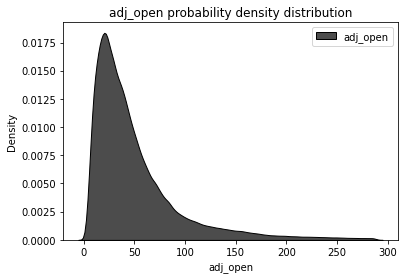

In [17]:
# Draw Plot
sns.kdeplot(df['adj_open'], shade=True, color="black", label="adj_open", alpha=.7)

# Decoration
plt.title('adj_open probability density distribution')
plt.legend()
plt.show()

## 2. 查看异常值处理后各数据的`概率密度分布图`

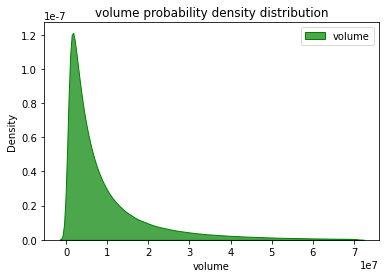

In [18]:
# 1. volume
# Draw Plot
sns.kdeplot(df['volume'], shade=True, color="g", label="volume", alpha=.7)

# Decoration
plt.title('volume probability density distribution')
plt.legend()
plt.show()

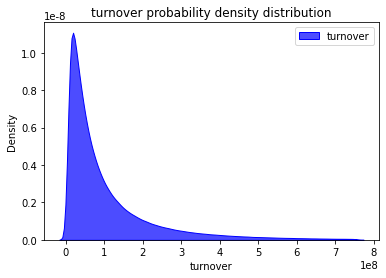

In [19]:
# 2. turnover
# Draw Plot
sns.kdeplot(df['turnover'], shade=True, color="b", label="turnover", alpha=.7)

# Decoration
plt.title('turnover probability density distribution')
plt.legend()
plt.show()

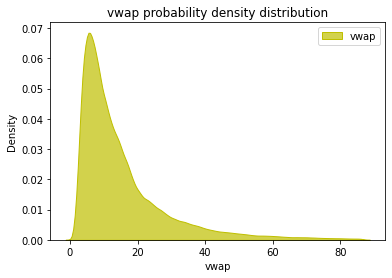

In [20]:
# 3. vwap
# Draw Plot
sns.kdeplot(df['vwap'], shade=True, color="y", label="vwap", alpha=.7)

# Decoration
plt.title('vwap probability density distribution')
plt.legend()
plt.show()

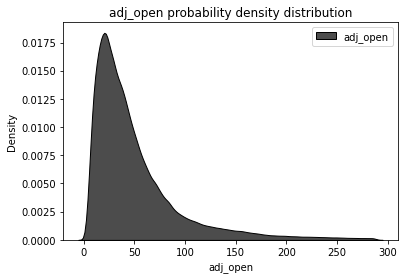

In [21]:
# 4. adj_open
# Draw Plot
sns.kdeplot(df['adj_open'], shade=True, color="black", label="adj_open", alpha=.7)

# Decoration
plt.title('adj_open probability density distribution')
plt.legend()
plt.show()

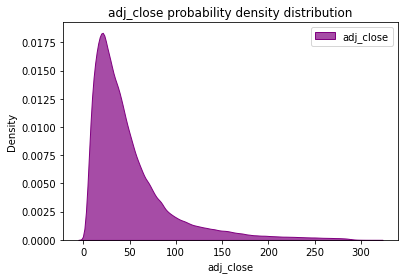

In [22]:
# 5. adj_open
# Draw Plot
sns.kdeplot(df['adj_close'], shade=True, color="purple", label="adj_close", alpha=.7)

# Decoration
plt.title('adj_close probability density distribution')
plt.legend()
plt.show()

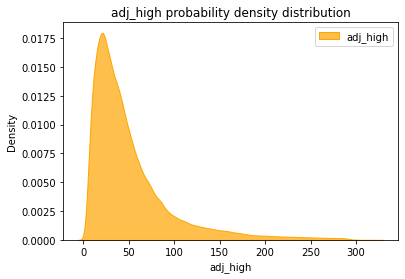

In [23]:
# 6. adj_high
# Draw Plot
sns.kdeplot(df['adj_high'], shade=True, color="orange", label="adj_high", alpha=.7)

# Decoration
plt.title('adj_high probability density distribution')
plt.legend()
plt.show()

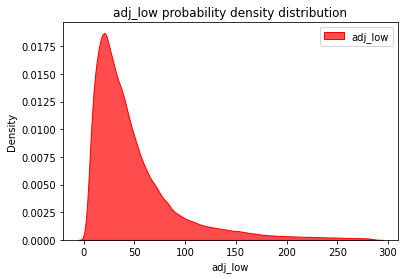

In [24]:
# 7. adj_low
# Draw Plot
sns.kdeplot(df['adj_low'], shade=True, color="red", label="adj_low", alpha=.7)

# Decoration
plt.title('adj_low probability density distribution')
plt.legend()
plt.show()

## 3. 删除数量过少的股票的数据
### 3.1 根据股票代码划分数据

In [25]:
stocks_code = df['kdcode'].unique()
stocks_num = len(stocks_code)
"股票数量",stocks_num

('股票数量', 4315)

In [ ]:
# 根据股票代码划分数据
df_ = pd.DataFrame(columns = df.columns)
for i, stock_i in enumerate(tqdm(stocks_code)):
    stock_i_data = df[df['kdcode'] == stock_i]
    if stock_i_data.shape[0] > 200:
        df_ = pd.concat([df_, stock_i_data])

df_

 88%|████████▊ | 3797/4315 [52:39<13:28,  1.56s/it]

In [ ]:
stocks_code = df_['kdcode'].unique()
stocks_num = len(stocks_code)
"去除后的股票数量",stocks_num

In [ ]:
# 按照kdcode,dt排序
df_.sort_values(by=['kdcode', 'dt'],axis=0,ascending=True,inplace=True)
df_

In [ ]:
# 设置dt为下标
df_.set_index(['dt'], inplace = True)
df_.index = pd.to_datetime(clean_df.index)

In [ ]:
df_.to_csv('data2.csv')